# Tasks
- Outliers more than `2xStandard Deviation` have been replaced with `mean`

- removed `race` and `native-country`
- Balance the dataset to directly by using `SmoteTomek` by keeping the ratio 1 for majority and minority class.
- Split the dataset `70-30` ratio
- Null values for both train and test have been replaced with `mean` of train.

Highest accuracy:
|Scaling|Model Name|Accuracy|
|:-----:|:--------:|:------:|
|StandardScaler|'LightGBM'|0.8634409335972156|
|MinMaxScaler|'Naive Bayes'|0.8184672080802566|
|No Scaling|**`'LightGBM'`**|**`0.865078823449123`**|

# Import Libraries

In [85]:
import pandas as pd
import my_packages as mypckg
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

# Dataset

In [86]:
df = pd.read_csv('../data/adult.csv', na_values="?", skipinitialspace=True)

## Categorical Data Encoding

In [87]:
# encode the dataset
df , mappings = mypckg.encoder(df)

In [88]:
mypckg.show(mappings)

{
    "workclass": {
        "Private": 0,
        "Local-gov": 1,
        "Self-emp-not-inc": 2,
        "Federal-gov": 3,
        "State-gov": 4,
        "Self-emp-inc": 5,
        "Without-pay": 6,
        "Never-worked": 7
    },
    "education": {
        "11th": 0,
        "HS-grad": 1,
        "Assoc-acdm": 2,
        "Some-college": 3,
        "10th": 4,
        "Prof-school": 5,
        "7th-8th": 6,
        "Bachelors": 7,
        "Masters": 8,
        "Doctorate": 9,
        "5th-6th": 10,
        "Assoc-voc": 11,
        "9th": 12,
        "12th": 13,
        "1st-4th": 14,
        "Preschool": 15
    },
    "marital-status": {
        "Never-married": 0,
        "Married-civ-spouse": 1,
        "Widowed": 2,
        "Divorced": 3,
        "Separated": 4,
        "Married-spouse-absent": 5,
        "Married-AF-spouse": 6
    },
    "occupation": {
        "Machine-op-inspct": 0,
        "Farming-fishing": 1,
        "Protective-serv": 2,
        "Other-service": 3,
        

## Feature and Target Separation

In [89]:
X = df.drop(['race', 'native-country', 'income'], axis=1)
y = df['income']

In [90]:
print(X)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25        0.0  226802          0                7               0   
1       38        0.0   89814          1                9               1   
2       28        1.0  336951          2               12               1   
3       44        0.0  160323          3               10               1   
4       18        NaN  103497          3               10               0   
...    ...        ...     ...        ...              ...             ...   
48837   27        0.0  257302          2               12               1   
48838   40        0.0  154374          1                9               1   
48839   58        0.0  151910          1                9               2   
48840   22        0.0  201490          1                9               0   
48841   52        5.0  287927          1                9               1   

       occupation  relationship  gender  capital-gain  capital-loss  \
0   

In [91]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


## Splitting

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep='\n')

(34189, 12)
(34189,)
(14653, 12)
(14653,)


## Finding and Removing Null Values

In [93]:
print(X_train.isnull().sum())

age                   0
workclass          1969
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1977
relationship          0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
dtype: int64


In [94]:
print(X_test.isnull().sum())

age                  0
workclass          830
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         832
relationship         0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
dtype: int64


In [95]:
X_train.fillna(X_train.mean(),inplace=True)
print(X_train.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64


In [96]:
X_test.fillna(X_train.mean(), inplace=True)
print(X_test.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64


## Outliers

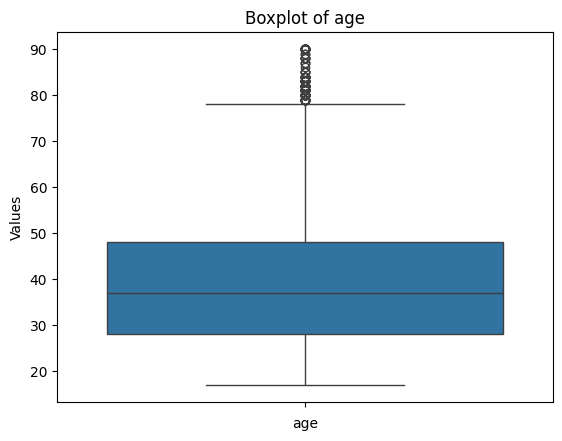

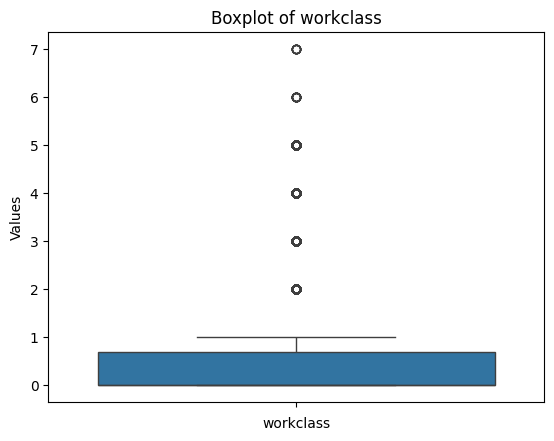

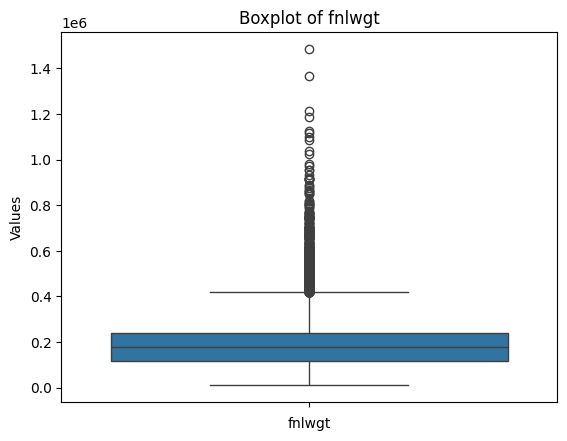

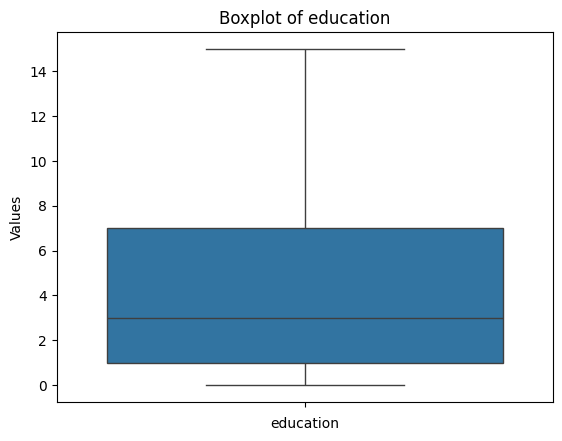

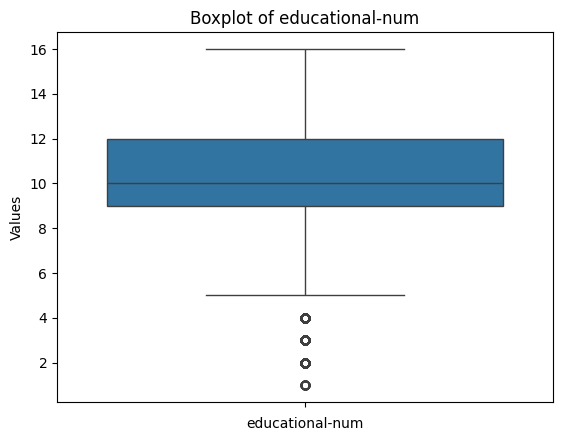

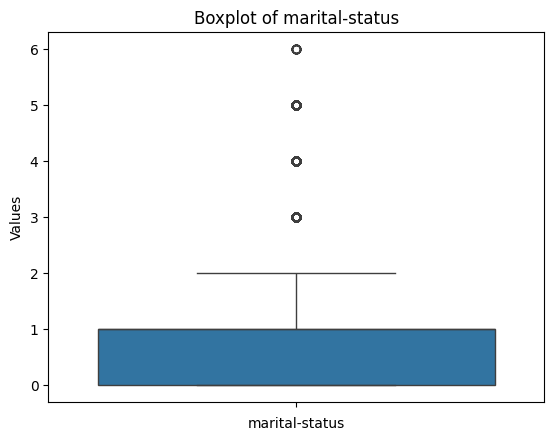

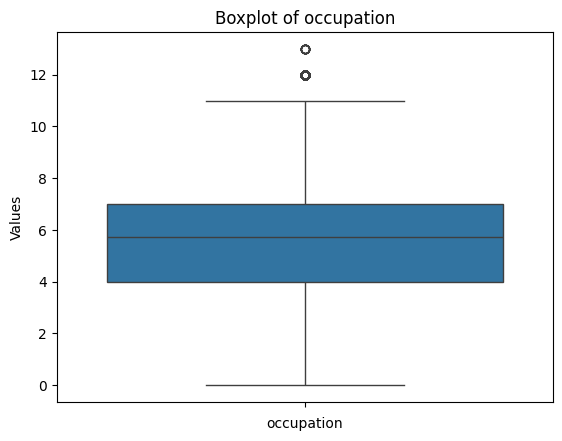

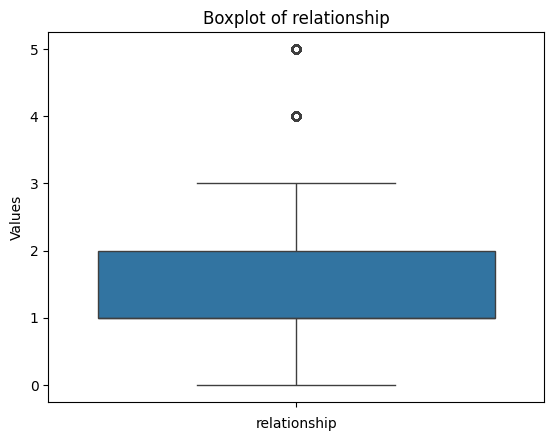

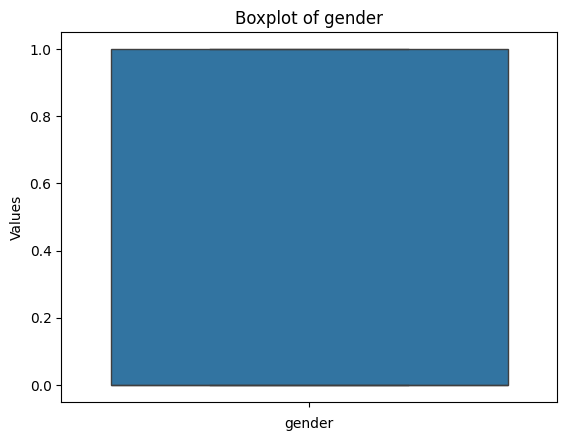

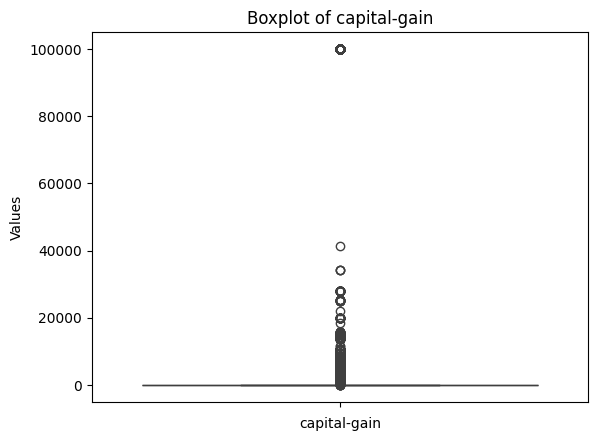

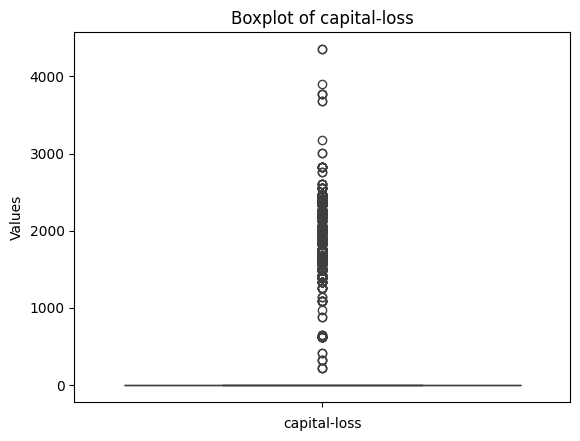

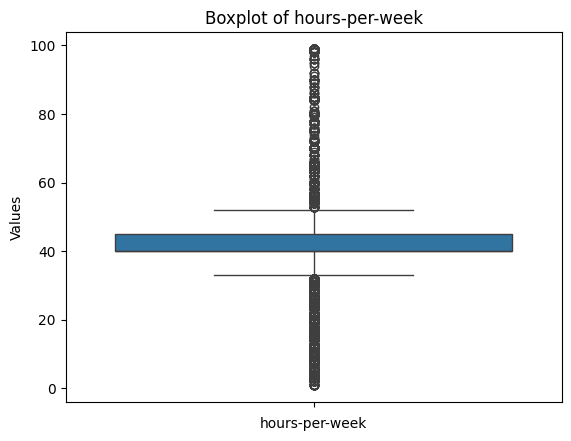

In [97]:
# Plotting boxplots for all columns/features
for column in X_train.columns:
    ax = sns.boxplot(data=X_train[column])
    plt.title('Boxplot of ' + column)
    ax.set(xlabel=column, ylabel='Values')
    plt.show()

In [98]:
for col in X_train.columns:
    mean = X_train[col].mean()
    sd = X_train[col].std()
    X_train[col].mask(X_train[col] > mean+(2*sd), mean, inplace=True)
    X_train[col].mask(X_train[col] < mean-(2*sd), mean, inplace=True)

C:\Users\raqib\AppData\Local\Temp\ipykernel_11816\689927882.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].mask(X_train[col] > mean+(2*sd), mean, inplace=True)
C:\Users\raqib\AppData\Local\Temp\ipykernel_11816\689927882.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38.68998800783878' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[col].mask(X_train[col] > mean+(2*sd), mean,

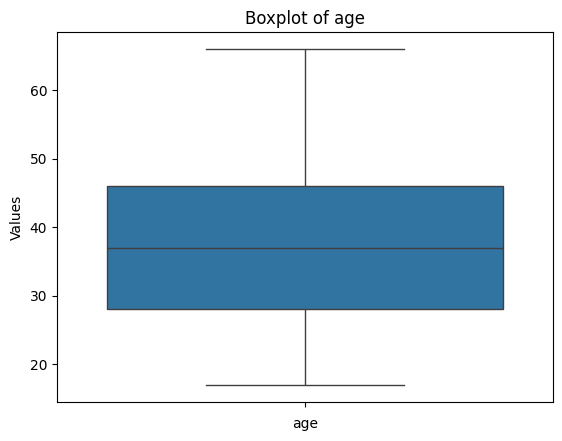

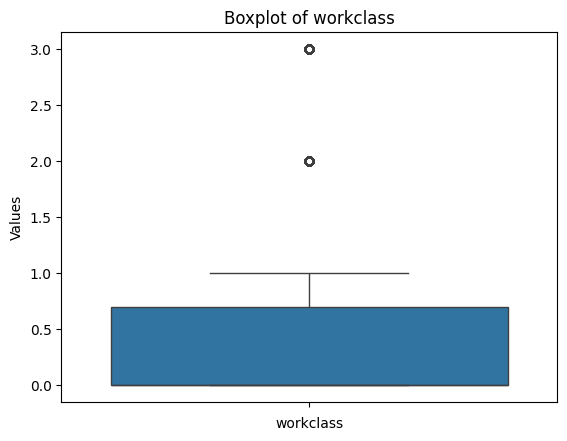

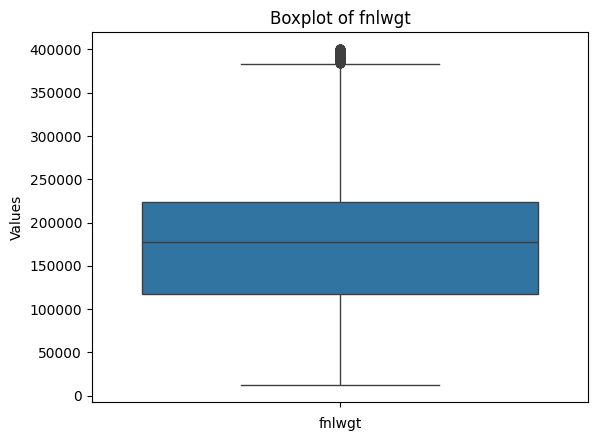

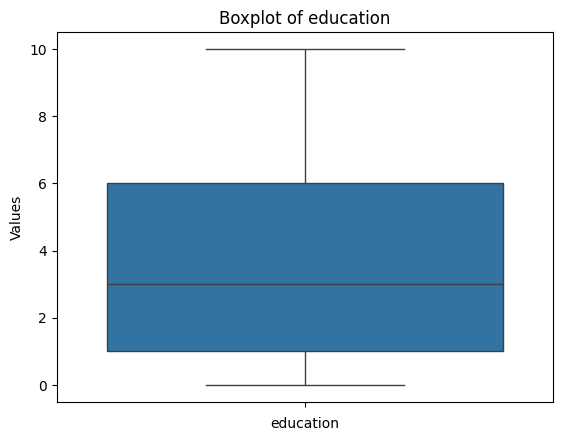

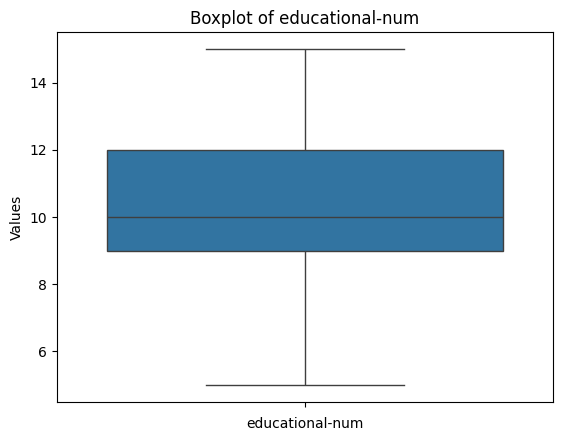

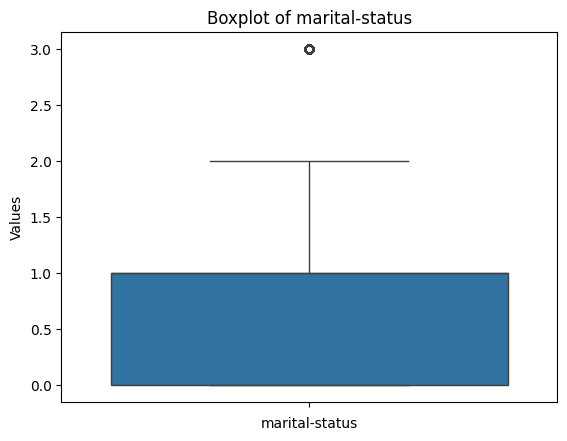

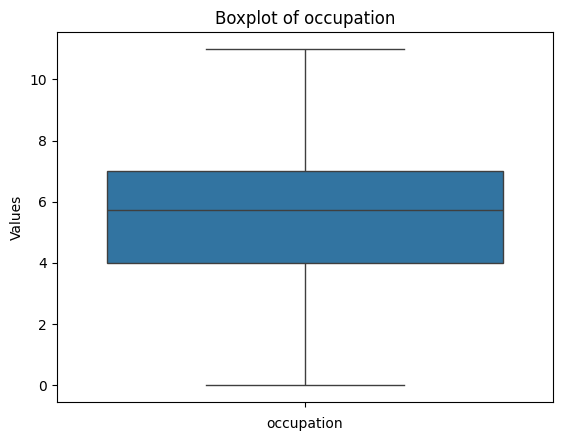

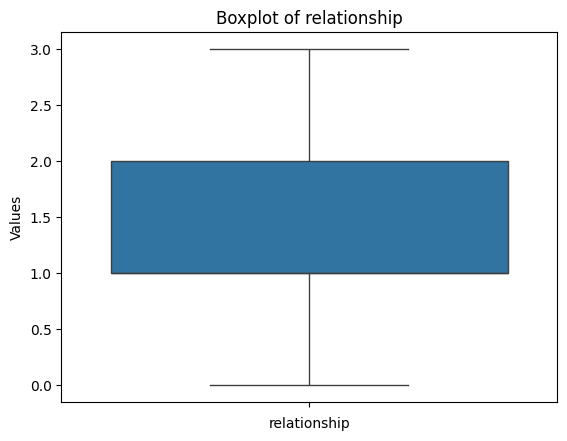

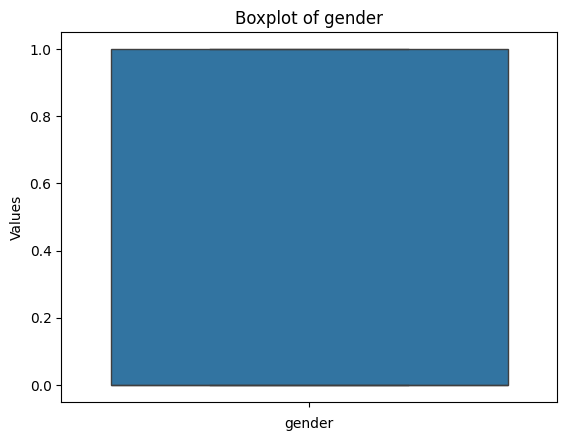

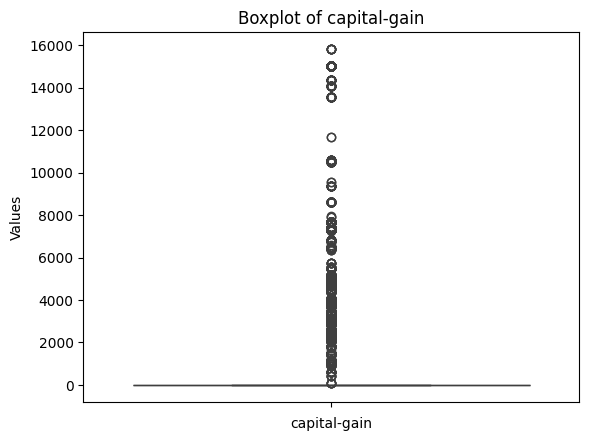

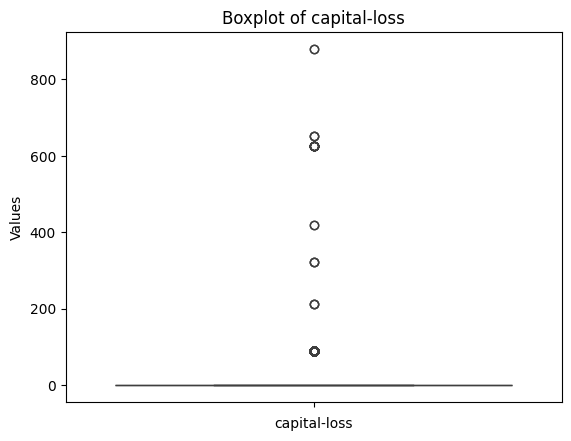

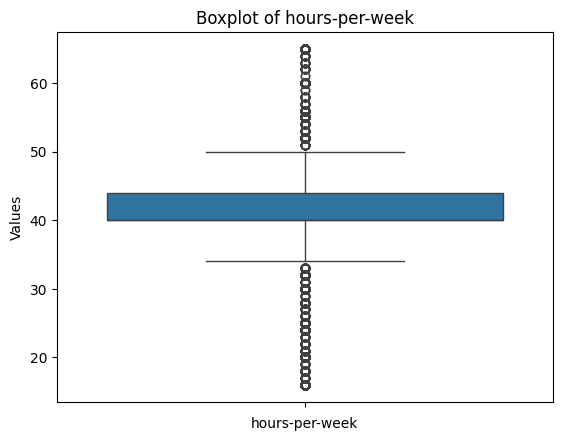

In [99]:
# Plotting boxplots for all columns/features
for column in X_train.columns:
    ax = sns.boxplot(data=X_train[column])
    plt.title('Boxplot of ' + column)
    ax.set(xlabel=column, ylabel='Values')
    plt.show()

## Allign the y_train and y_test according to the indecies of X_train and X_test

In [100]:
y_train = y_train.loc[X_train.index]
y_test= y_test.loc[X_test.index]

## Balance the Dataset

In [101]:
y_train.describe()

count    34189.000000
mean         0.241803
std          0.428182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

In [102]:
y_train.shape

(34189,)

In [103]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 34189 entries, 42392 to 15795
Series name: income
Non-Null Count  Dtype
--------------  -----
34189 non-null  int64
dtypes: int64(1)
memory usage: 534.2 KB


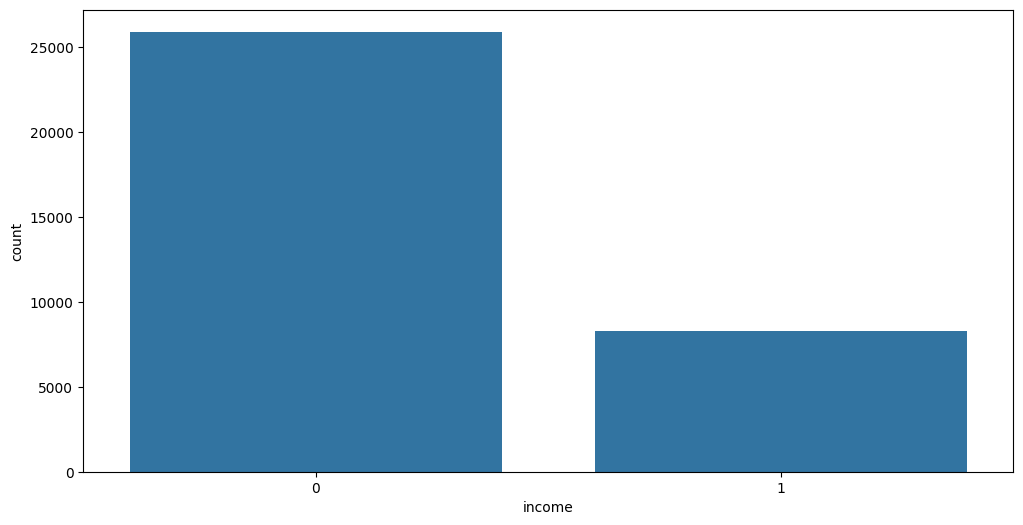

In [104]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

In [105]:
y_train.value_counts()

income
0    25922
1     8267
Name: count, dtype: int64

In [106]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy=1, random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

print(f"Y after resampling: {Counter(y_train)}")

Y after resampling: Counter({0: 23688, 1: 23688})


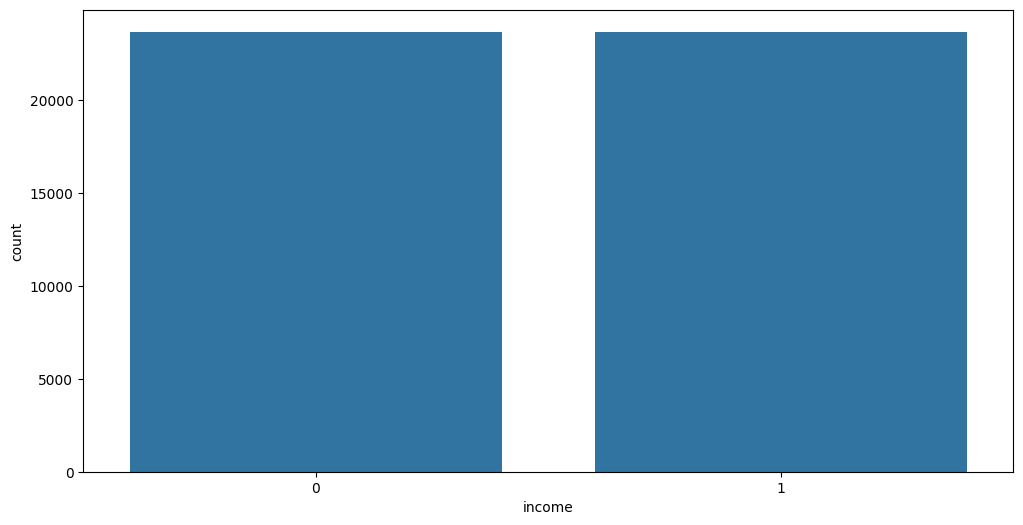

In [107]:
plt.figure(figsize=(12,6))
sns.countplot(x=y_train)
plt.show()

## Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_scaled_ss_train = ss.transform(X_train)
X_scaled_ss_test = ss.transform(X_test)

In [109]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(X_train)
X_scaled_mm_train = mm.fit_transform(X_train)
X_scaled_mm_test = mm.fit_transform(X_test)

# Apply Models

In [110]:
models = mypckg.get_models()
models

{'Logistic Regression': LogisticRegression(max_iter=1000),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Support Vector Classifier': SVC(),
 'Naive Bayes': GaussianNB(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'LightGBM': LGBMClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None,

In [111]:
accuracies = mypckg.run_the_models(models, X_train, y_train, X_test, y_test)

e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6679860779362587
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     11233
           1       0.38      0.68      0.49      3420

    accuracy                           0.67     14653
   macro avg       0.63      0.67      0.62     14653
weighted avg       0.76      0.67      0.69     14653

Confusion Matrix:
[[7460 3773]
 [1092 2328]]
--------------------------------------------------------------------------------
Accuracy for Logistic Regression: 0.6679860779362587


Model: Decision Tree
Accuracy: 0.7817511772333311
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     11233
           1       0.53      0.63      0.57      3420

    accuracy                           0.78     14653
   macro avg       0.70      0.73      0.71     14653
weighted avg       0.80      0.78      0.79     14653

Confusion Mat

e:\codes\data-analysis\adult-income-prediction\env-adult-income-prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.8474715075411179
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11233
           1       0.67      0.69      0.68      3420

    accuracy                           0.85     14653
   macro avg       0.79      0.79      0.79     14653
weighted avg       0.85      0.85      0.85     14653

Confusion Matrix:
[[10056  1177]
 [ 1058  2362]]
--------------------------------------------------------------------------------
Accuracy for AdaBoost: 0.8474715075411179


[LightGBM] [Info] Number of positive: 23688, number of negative: 23688
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 47376, number of used features: 12
[LightG

## Highest Accuracy

In [112]:
mypckg.highest_accuracy(accuracies)

The higest accuracy in this experiment:
LightGBM -->> 0.865078823449123


('LightGBM', 0.865078823449123)